# Getting a predefined colormap

First, getting a named colormap, most of which are listed in [Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/users/explain/colors/colormaps.html#colormaps), may be done using `matplotlib.colormaps`, which returns a colormap object. The length of the list of colors used internally to define the colormap can be adjusted via `Colormap.resampled`. Below we use a modest value of 8 so there are not a lot of values to look at.

- Access colormaps with `mpl.colormaps` (dict) (shown below)
- Create a replica of a predefined colormap by accessing it and then using `.resampled()`, with the argument of `.resampled()` being the number of hues of the colormap you want. (shown below)

## Getting a colormap

In [19]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

samples = 5
viridis = mpl.colormaps['viridis'].resampled(samples)

Printing it

In [20]:
print(viridis)

Showing it (TODO: Learn how to show it manually)

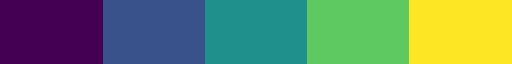

In [21]:
viridis

## How to get individual colors

## Getting color values by calling the colormap e.g. `viridis()`

Get all the color values by
1. Calling the colormap e.g. `viridis()`
2. Using the `colors` (list) attribute e.g. `viridis.colors[]`

In [22]:
np.empty(5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [23]:
print(viridis(2))
viridis.colors[2]

(0.127568, 0.566949, 0.550556, 1.0)


array([0.127568, 0.566949, 0.550556, 1.      ])

In [24]:
idxs = np.arange(0,1,0.01)

for idx in idxs:
    print(viridis(idx))

(0.267004, 0.004874, 0.329415, 1.0)
(0.267004, 0.004874, 0.329415, 1.0)
(0.267004, 0.004874, 0.329415, 1.0)
(0.267004, 0.004874, 0.329415, 1.0)
(0.267004, 0.004874, 0.329415, 1.0)
(0.267004, 0.004874, 0.329415, 1.0)
(0.267004, 0.004874, 0.329415, 1.0)
(0.267004, 0.004874, 0.329415, 1.0)
(0.267004, 0.004874, 0.329415, 1.0)
(0.267004, 0.004874, 0.329415, 1.0)
(0.267004, 0.004874, 0.329415, 1.0)
(0.267004, 0.004874, 0.329415, 1.0)
(0.267004, 0.004874, 0.329415, 1.0)
(0.267004, 0.004874, 0.329415, 1.0)
(0.267004, 0.004874, 0.329415, 1.0)
(0.267004, 0.004874, 0.329415, 1.0)
(0.267004, 0.004874, 0.329415, 1.0)
(0.267004, 0.004874, 0.329415, 1.0)
(0.267004, 0.004874, 0.329415, 1.0)
(0.267004, 0.004874, 0.329415, 1.0)
(0.229739, 0.322361, 0.545706, 1.0)
(0.229739, 0.322361, 0.545706, 1.0)
(0.229739, 0.322361, 0.545706, 1.0)
(0.229739, 0.322361, 0.545706, 1.0)
(0.229739, 0.322361, 0.545706, 1.0)
(0.229739, 0.322361, 0.545706, 1.0)
(0.229739, 0.322361, 0.545706, 1.0)
(0.229739, 0.322361, 0.54570

# A peek at the colormaps object

In [25]:
# Copied from source
# ------------------

class ColormapRegistry(Mapping):
    r"""
    Container for colormaps that are known to Matplotlib by name.

    The universal registry instance is `matplotlib.colormaps`. There should be
    no need for users to instantiate `.ColormapRegistry` themselves.

    Read access uses a dict-like interface mapping names to `.Colormap`\s::

        import matplotlib as mpl
        cmap = mpl.colormaps['viridis']

    Returned `.Colormap`\s are copies, so that their modification does not
    change the global definition of the colormap.

    Additional colormaps can be added via `.ColormapRegistry.register`::

        mpl.colormaps.register(my_colormap)

    To get a list of all registered colormaps, you can do::

        from matplotlib import colormaps
        list(colormaps)
    """
    def __init__(self, cmaps):
        self._cmaps = cmaps
        self._builtin_cmaps = tuple(cmaps)


    def __getitem__(self, item):
        try:
            return self._cmaps[item].copy()
        except KeyError:
            raise KeyError(f"{item!r} is not a known colormap name") from None


    def __iter__(self):
        return iter(self._cmaps)


    def __len__(self):
        return len(self._cmaps)


    def __str__(self):
        return ('ColormapRegistry; available colormaps:\n' +
                ', '.join(f"'{name}'" for name in self))


    def __call__(self):
        """
        Return a list of the registered colormap names.

        This exists only for backward-compatibility in `.pyplot` which had a
        ``plt.colormaps()`` method. The recommended way to get this list is
        now ``list(colormaps)``.
        """
        return list(self)


    def register(self, cmap, *, name=None, force=False):
        """
        Register a new colormap.

        The colormap name can then be used as a string argument to any ``cmap``
        parameter in Matplotlib. It is also available in ``pyplot.get_cmap``.

        The colormap registry stores a copy of the given colormap, so that
        future changes to the original colormap instance do not affect the
        registered colormap. Think of this as the registry taking a snapshot
        of the colormap at registration.

        Parameters
        ----------
        cmap : matplotlib.colors.Colormap
            The colormap to register.

        name : str, optional
            The name for the colormap. If not given, ``cmap.name`` is used.

        force : bool, default: False
            If False, a ValueError is raised if trying to overwrite an already
            registered name. True supports overwriting registered colormaps
            other than the builtin colormaps.
        """
        _api.check_isinstance(colors.Colormap, cmap=cmap)


        name = name or cmap.name
        if name in self:
            if not force:
                # don't allow registering an already existing cmap
                # unless explicitly asked to
                raise ValueError(
                    f'A colormap named "{name}" is already registered.')
            elif name in self._builtin_cmaps:
                # We don't allow overriding a builtin.
                raise ValueError("Re-registering the builtin cmap "
                                 f"{name!r} is not allowed.")


            # Warn that we are updating an already existing colormap
            _api.warn_external(f"Overwriting the cmap {name!r} "
                               "that was already in the registry.")


        self._cmaps[name] = cmap.copy()
        # Someone may set the extremes of a builtin colormap and want to register it
        # with a different name for future lookups. The object would still have the
        # builtin name, so we should update it to the registered name
        if self._cmaps[name].name != name:
            self._cmaps[name].name = name


    def unregister(self, name):
        """
        Remove a colormap from the registry.

        You cannot remove built-in colormaps.

        If the named colormap is not registered, returns with no error, raises
        if you try to de-register a default colormap.

        .. warning::

            Colormap names are currently a shared namespace that may be used
            by multiple packages. Use `unregister` only if you know you
            have registered that name before. In particular, do not
            unregister just in case to clean the name before registering a
            new colormap.

        Parameters
        ----------
        name : str
            The name of the colormap to be removed.

        Raises
        ------
        ValueError
            If you try to remove a default built-in colormap.
        """
        if name in self._builtin_cmaps:
            raise ValueError(f"cannot unregister {name!r} which is a builtin "
                             "colormap.")
        self._cmaps.pop(name, None)


    def get_cmap(self, cmap):
        """
        Return a color map specified through *cmap*.

        Parameters
        ----------
        cmap : str or `~matplotlib.colors.Colormap` or None

            - if a `.Colormap`, return it
            - if a string, look it up in ``mpl.colormaps``
            - if None, return the Colormap defined in :rc:`image.cmap`

        Returns
        -------
        Colormap
        """
        # get the default color map
        if cmap is None:
            return self[mpl.rcParams["image.cmap"]]


        # if the user passed in a Colormap, simply return it
        if isinstance(cmap, colors.Colormap):
            return cmap
        if isinstance(cmap, str):
            _api.check_in_list(sorted(_colormaps), cmap=cmap)
            # otherwise, it must be a string so look it up
            return self[cmap]
        raise TypeError(
            'get_cmap expects None or an instance of a str or Colormap . ' +
            f'you passed {cmap!r} of type {type(cmap)}'
        )

NameError: name 'Mapping' is not defined

Let's look at all the colormaps

In [26]:
for i in mpl.colormaps:
    print(i)

print(len(mpl.colormaps))
# >> 170

magma
inferno
plasma
viridis
cividis
twilight
twilight_shifted
turbo
Blues
BrBG
BuGn
BuPu
CMRmap
GnBu
Greens
Greys
OrRd
Oranges
PRGn
PiYG
PuBu
PuBuGn
PuOr
PuRd
Purples
RdBu
RdGy
RdPu
RdYlBu
RdYlGn
Reds
Spectral
Wistia
YlGn
YlGnBu
YlOrBr
YlOrRd
afmhot
autumn
binary
bone
brg
bwr
cool
coolwarm
copper
cubehelix
flag
gist_earth
gist_gray
gist_heat
gist_ncar
gist_rainbow
gist_stern
gist_yarg
gnuplot
gnuplot2
gray
hot
hsv
jet
nipy_spectral
ocean
pink
prism
rainbow
seismic
spring
summer
terrain
winter
Accent
Dark2
Paired
Pastel1
Pastel2
Set1
Set2
Set3
tab10
tab20
tab20b
tab20c
grey
gist_grey
gist_yerg
Grays
magma_r
inferno_r
plasma_r
viridis_r
cividis_r
twilight_r
twilight_shifted_r
turbo_r
Blues_r
BrBG_r
BuGn_r
BuPu_r
CMRmap_r
GnBu_r
Greens_r
Greys_r
OrRd_r
Oranges_r
PRGn_r
PiYG_r
PuBu_r
PuBuGn_r
PuOr_r
PuRd_r
Purples_r
RdBu_r
RdGy_r
RdPu_r
RdYlBu_r
RdYlGn_r
Reds_r
Spectral_r
Wistia_r
YlGn_r
YlGnBu_r
YlOrBr_r
YlOrRd_r
afmhot_r
autumn_r
binary_r
bone_r
brg_r
bwr_r
cool_r
coolwarm_r
copper_r
cu

# Creating a colormap

- Done via classes `ListedColormap` or `LinearSegmentedColormap`. 
- Both the above classes map [0,1] -> color

## `ListedColormap` [Source](https://github.com/matplotlib/matplotlib/blob/v3.9.1/lib/matplotlib/colors.py#L1133-L1225), [Ref](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html#matplotlib.colors.ListedColormap)

Example:

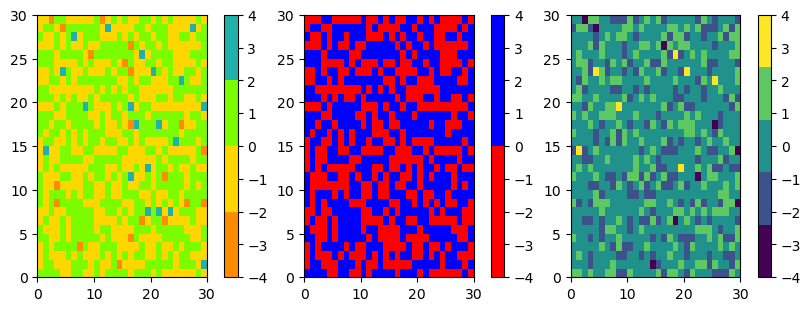

In [27]:
def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            layout='constrained', squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

# create colormaps
cmap1 = ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])
cmap2 = ListedColormap(["red", "blue"])

# we can also use a predefined colormap
cmap3 = viridis

# plot
plot_examples([cmap1, cmap2, cmap3])

The `axs.flat` in this code is used to create a flattened iterator over all the axes in the `axs` array.

Let's break it down:

1. `fig, axs = plt.subplots(1, n, ...)` creates a figure with `n` subplots in a single row. The `axs` returned is a 2D array of Axes objects.

2. Even though we have a single row of subplots, `axs` is still a 2D array with shape (1, n).

3. `axs.flat` is a 1D iterator that allows you to iterate over all the Axes objects in `axs`, regardless of its dimensionality.

In the context of this function:

```python
for [ax, cmap] in zip(axs.flat, colormaps):
```

This line is using `axs.flat` to iterate over all the subplot Axes objects in a flattened manner, pairing each Axes object with a corresponding colormap from the `colormaps` list.

Using `axs.flat` simplifies the iteration process, especially when dealing with potentially multi-dimensional arrays of subplots. It allows the code to work seamlessly whether you have a 1D or 2D arrangement of subplots.

Would you like me to explain any other parts of this code?

### Modifying predefined colormaps

### Example 1

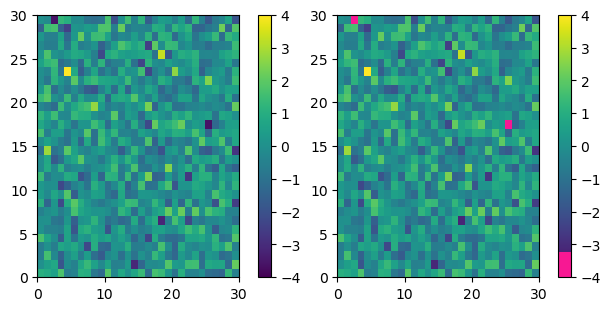

In [28]:
# Take a ready-made colormap and shove it into another variable
viridis = mpl.colormaps['viridis'].resampled(256)
newcolors = viridis(np.linspace(0,1,256))

# create a random color and shove it into the new variable
pink = np.array([248/256, 24/256, 148/256, 1])
newcolors[:25, :] = pink

# create modified colormap
newcmp = ListedColormap(newcolors)

plot_examples([viridis, newcmp])

### Combining colormaps

### Example 2

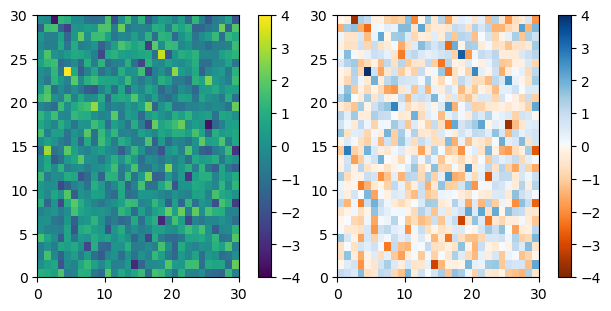

In [29]:
top = mpl.colormaps['Oranges_r'].resampled(128)
bottom = mpl.colormaps['Blues'].resampled(128)

newcolors = np.vstack((top(np.linspace(0,1,128)),
                       bottom(np.linspace(0,1,128))))

newcmp = ListedColormap(newcolors, name='OrangeBlue')
plot_examples([viridis, newcmp])

### Creating colormap from scratch

Of course we need not start from a named colormap, we just need to create the (N, 4) array to pass to `ListedColormap`. Here we create a colormap that goes from brown (RGB: 90, 40, 40) to white (RGB: 255, 255, 255).

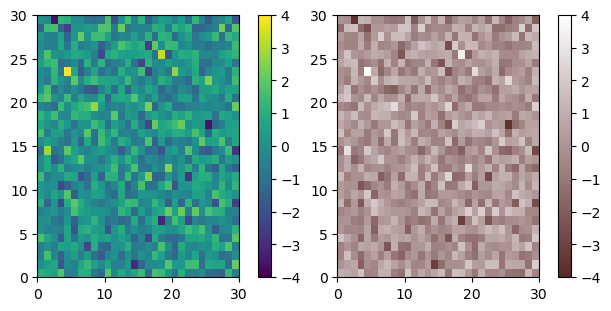

In [30]:
N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(90/256, 1, N) # red value
vals[:, 1] = np.linspace(40/256, 1, N) # green value
vals[:, 2] = np.linspace(40/256, 1, N)
newcmp = ListedColormap(vals)
plot_examples([viridis, newcmp])

## `LinearSegmentedColormap` [Ref](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.LinearSegmentedColormap.html#matplotlib.colors.LinearSegmentedColormap), [Source](https://github.com/matplotlib/matplotlib/blob/v3.9.1/lib/matplotlib/colors.py#L970-L1130)

Read the section on LinearSegementedColormaps from this article: https://www.jumpingrivers.com/blog/customising-matplotlib/

The LinearSegmentedColormap class specifies colormaps using anchor points between which RGB(A) values are interpolated

Rather than taking a list of colours that make up the map, `LinearSegmentedColormaps` take an argument called `segmentdata`. This argument is a dictionary with the keys “red”, “green” and “blue”. Each value in the dictionary is a list of tuples. These tuples specify colour values before and after points in the colourmap as `[(i, y[i-1], y[i+1])]`. Here `i` is a point on the map, `y[i-1]` is the colour value of the point before `i`, and `y[i+1]` is the colour value after `i`. The other colour values on the map are obtained by performing linear interpolation between these specified anchor points.

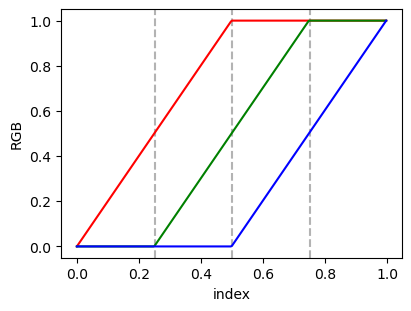

In [31]:
cdict = {'red':   [[0.0,  0.0, 0.0],
                   [0.5,  1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'green': [[0.0,  0.0, 0.0],
                   [0.25, 0.0, 0.0],
                   [0.75, 1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'blue':  [[0.0,  0.0, 0.0],
                   [0.5,  0.0, 0.0],
                   [1.0,  1.0, 1.0]]}


def plot_linearmap(cdict):
    newcmp = LinearSegmentedColormap('testCmap', segmentdata=cdict, N=256)
    rgba = newcmp(np.linspace(0, 1, 256))
    fig, ax = plt.subplots(figsize=(4, 3), layout='constrained')
    col = ['r', 'g', 'b']
    for xx in [0.25, 0.5, 0.75]:
        ax.axvline(xx, color='0.7', linestyle='--')
    for i in range(3):
        ax.plot(np.arange(256)/256, rgba[:, i], color=col[i])
    ax.set_xlabel('index')
    ax.set_ylabel('RGB')
    plt.show()

plot_linearmap(cdict)

In the example below there is a discontinuity in red at 0.5. The interpolation between 0 and 0.5 goes from 0.3 to 1, and between 0.5 and 1 it goes from 0.9 to 1. Note that `red[0, 1]`, and `red[2, 2]` are both superfluous to the interpolation because `red[0, 1]` (i.e., `yleft[0]`) is the value to the left of 0, and `red[2, 2]` (i.e., `yright[2]`) is the value to the right of 1, which are outside the color mapping domain

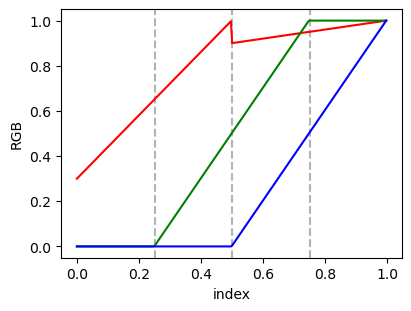

In [32]:
cdict['red'] = [[0.0,  0.0, 0.3],
                [0.5,  1.0, 0.9],
                [1.0,  1.0, 1.0]]
plot_linearmap(cdict)



For example, we could have the following segmentdata dictionary:

### Example 1

In [33]:
cdict = {
    "red": [
        (0, 0, 0), # start off with r=0
        (0.25, 1, 0), # r increases from 0-1 bewteen 0-0.25, then drops to 0
        (1, 0, 0), # end with r=0
    ],
    "green": [
        (0, 0, 0), # start off with g=0
        (0.25, 0, 0), # at 0.25, g is still 0
        (0.75, 1, 0), # g increases from 0-1 between 0.25-0.75, then drops to 0
        (1, 0, 0),  # g is 0 between 0.75 and 1
    ],
    "blue": [
        (0, 0, 0), # start off with b=0
        (0.75, 0, 0), # b is 0 between 0 and 0.75
        (1, 1, 1), # b increases from 0 to 1 between points 0.75 and 1
    ],
}

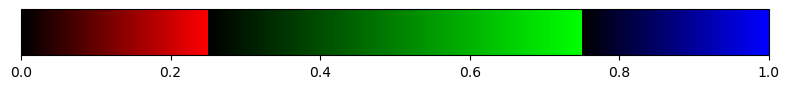

In [34]:
from matplotlib.colors import LinearSegmentedColormap

def plot_cmap(cmap):
    fig, cax = plt.subplots(figsize=(8, 1))
    cb1 = mpl.colorbar.Colorbar(cax, cmap=cmap, orientation="horizontal")
    plt.tight_layout()
    plt.show()

seg_cmap = LinearSegmentedColormap("seg_cmap", cdict)
plot_cmap(seg_cmap)

This way of creating a colourmap is a bit longwinded. Luckily, there is an easier way to create a LinearSegmentedColormap using the `.from_list()` method. This takes a list of colours to be used as **equally spaced anchor points**.

### Example 2

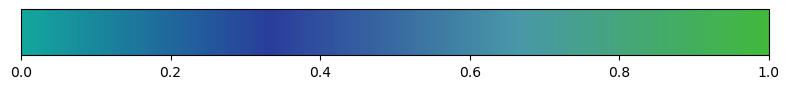

In [35]:
color_list = ["#12a79d", "#293d9b", "#4898a8", "#40b93c"]
seg_cmap = LinearSegmentedColormap.from_list("mymap", color_list)
plot_cmap(seg_cmap)

If desired, the nodes of the colormap can be given as numbers between 0 and 1. For example, one could have the reddish part take more space in the colormap.

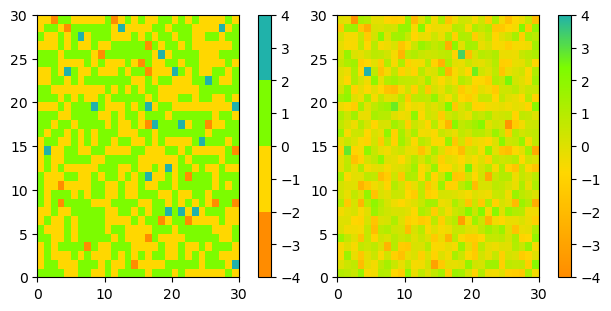

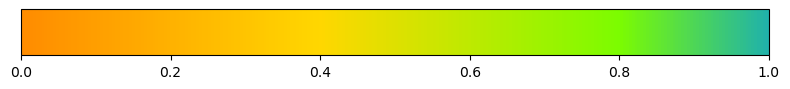

In [36]:
colors = ["darkorange", "gold", "lawngreen", "lightseagreen"]
nodes = [0.0, 0.4, 0.8, 1.0]
cmap2 = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))

plot_examples([cmap1, cmap2])
plot_cmap(cmap2)

## Reversing a colormap

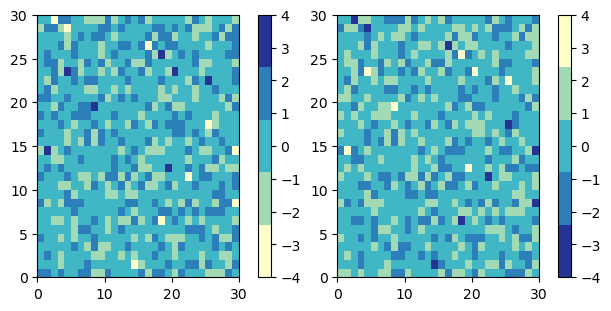

In [37]:
colors = ["#ffffcc", "#a1dab4", "#41b6c4", "#2c7fb8", "#253494"]
my_cmap = ListedColormap(colors, name="my_cmap")

my_cmap_r = my_cmap.reversed()

plot_examples([my_cmap, my_cmap_r])

# Registering a colormap

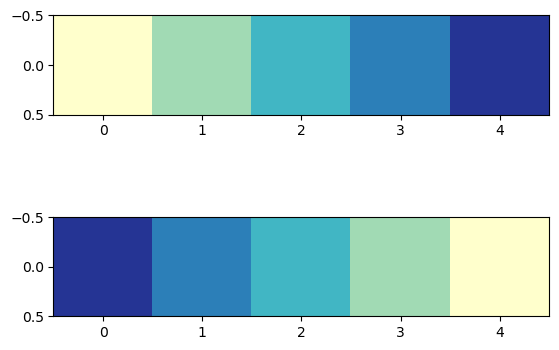

In [38]:
# my_cmap, my_cmap_r from reversing a colormap
mpl.colormaps.register(cmap=my_cmap)
mpl.colormaps.register(cmap=my_cmap_r)

data = [[1, 2, 3, 4, 5]]

fig, (ax1, ax2) = plt.subplots(nrows=2)

ax1.imshow(data, cmap='my_cmap')
ax2.imshow(data, cmap='my_cmap_r')

plt.show()